In [12]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터 불러오기 (학습 데이터, 테스트 데이터)
데이터 분석 단계(농구선수_데이터분석.ipynb)에서 생성한 농구 선수 포지션 예측하기의  
학습 데이터 및 테스트 데이터를 로드합니다.

In [13]:
with open('../data/pkl/basketball_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
    
with open('../data/pkl/basketball_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

# 최적의 k 찾기 (교차 검증 - cross validation)

In [14]:
# kNN 라이브러리를 추가합니다
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k를 찾기 위해, 교차 검증을 수행할 k의 범위를 3부터 학습데이터 양의 절반까지 설정합니다.
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK' , 'TRB']]
y_train = train[['Pos']]

# 교차 검증 (10-fold)을 실행합니다
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.93571428571428572,
 0.93571428571428572,
 0.92460317460317465,
 0.93571428571428572,
 0.91071428571428581,
 0.91071428571428581,
 0.89821428571428574,
 0.89821428571428574,
 0.89821428571428574,
 0.87321428571428572,
 0.84642857142857131,
 0.85892857142857137,
 0.85892857142857137,
 0.85892857142857137,
 0.83531746031746024,
 0.82420634920634916,
 0.82420634920634916,
 0.81170634920634921,
 0.82420634920634916]

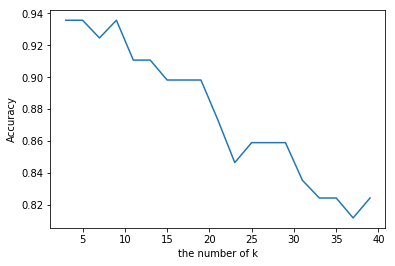

In [15]:
# k에 따른 정확도를 시각화합니다
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [16]:
# 가장 예측율이 높은 k를 선정합니다
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )

The best number of k : 3


# 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [17]:
# 정확도 측정에 사용할 라이브러리를 추가합니다
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 특징을 지정합니다
x_train = train[['3P', 'BLK']]
# 특징으로 예측할 값 (농구선수 포지션)을 지정합니다
y_train = train[['Pos']]

# 학습 데이터로 knn 모델을 구성합니다
knn.fit(x_train, y_train.values.ravel())

# 테스트에 사용될 특징을 지정합니다
x_test = test[['3P', 'BLK']]

# 특징으로 예측할 값 (농구선수 포지션)을 지정합니다
y_test = test[['Pos']]

# 테스트합니다
pred = knn.predict(x_test)

In [18]:
# 실제값(ground truth)과 예측값(prediction)이 어느 정도 일치하는 눈으로 직접 비교해봅니다
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,ground_truth,prediction
0,C,C
1,C,C
2,SG,SG
3,SG,SG
4,C,C
5,C,C
6,C,SG
7,C,C
8,C,C
9,C,C


In [19]:
# 모델 예측 정확도(accuracy)를 확인합니다
print("accuracy : "+ str(accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.95


# 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [20]:
knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 특징을 지정합니다
x_train = train[['3P', 'BLK', 'TRB']]
# 특징으로 예측할 값 (농구선수 포지션)을 지정합니다
y_train = train[['Pos']]

# 학습 데이터로 knn 모델을 구성합니다
knn.fit(x_train, y_train.values.ravel())

# 테스트에 사용될 특징을 지정합니다
x_test = test[['3P', 'BLK', 'TRB']]

# 특징으로 예측할 값 (농구선수 포지션)을 지정합니다
y_test = test[['Pos']]

# 테스트합니다
pred = knn.predict(x_test)

In [21]:
# 실제값(ground truth)과 예측값(prediction)이 어느 정도 일치하는 눈으로 직접 비교해봅니다
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,ground_truth,prediction
0,C,C
1,C,C
2,SG,SG
3,SG,C
4,C,C
5,C,C
6,C,SG
7,C,C
8,C,C
9,C,C


In [22]:
# 모델 예측 정확도(accuracy)를 확인합니다
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.85
